In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset

data_train = np.loadtxt("ECG5000_TRAIN.tsv")
X_train = to_time_series_dataset(data_train[:,1:])
print("時系列データの総数 : ",len(data_train))
print("クラスの数 : ", len(np.unique(data_train[:,0])))
print("時系列の長さ : ",len(data_train[0,1:]))

時系列データの総数 :  500
クラスの数 :  5
時系列の長さ :  140


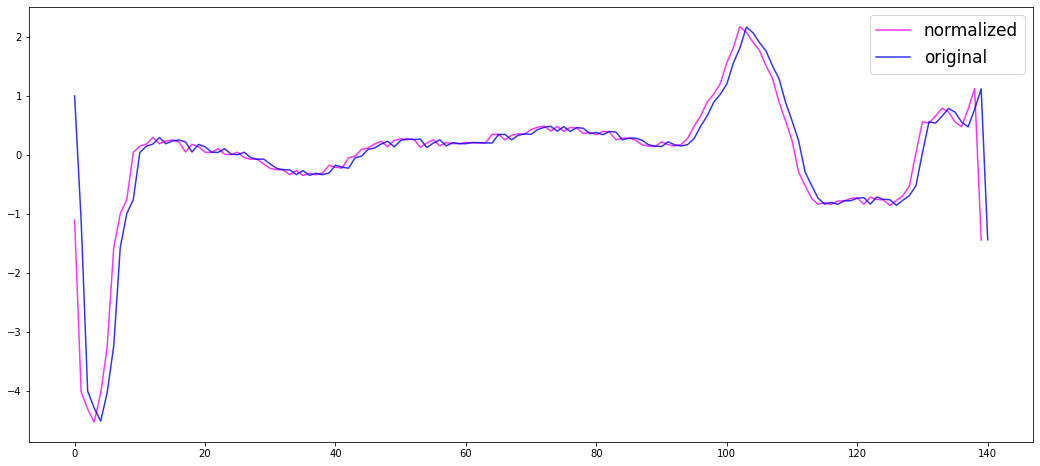

In [6]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset

X_train = to_time_series_dataset(data_train[:,1:])
X_train = TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(X_train)

plt.figure(figsize=(18, 8))
plt.plot(X_train[1],c='magenta',alpha=0.8,label="normalized")
plt.plot(data_train[1],c='blue',alpha=0.8,label="original")
plt.legend(fontsize=17)

IndexError: single positional indexer is out-of-bounds

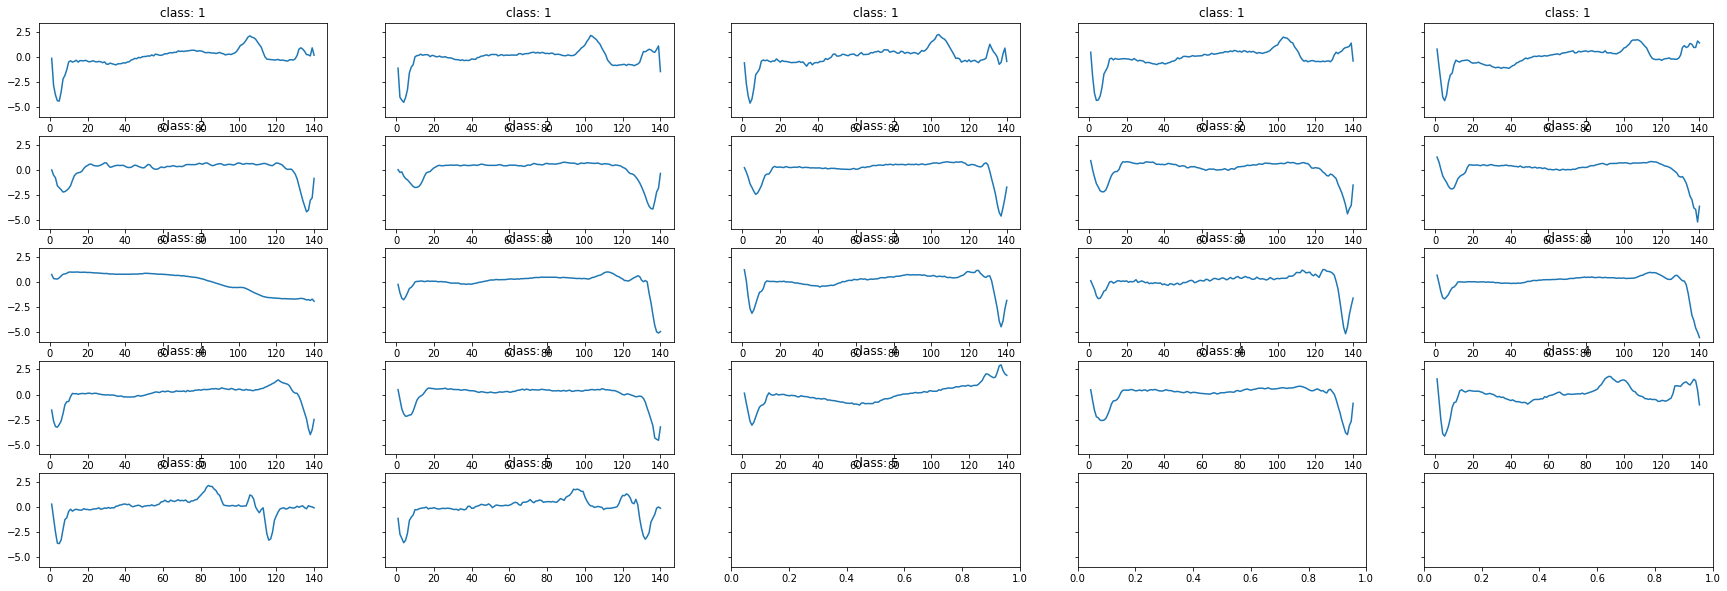

In [8]:
import pandas as pd

fig, ax = plt.subplots(5,5,figsize=[30,10],sharey=True)

ax_f = ax.flatten()

#class1～５のプロット
df_train = pd.DataFrame(data_train)

cnt = 0
for class_i in range(1,6):
  df_train_plot = df_train[df_train[0] == class_i]
  for i in range(0,5):
      ax_f[cnt].set_title("class: {}".format(class_i))
      ax_f[cnt].plot(df_train_plot.iloc[i][1:])
      cnt += 1

In [4]:
from tslearn.clustering import KShape
ks = KShape(n_clusters=2,max_iter=100,n_init=100,verbose=0)
ks.fit(X_train)
y_pred = ks.fit_predict(X_train)
print(y_pred)

ValueError: attempt to get argmin of an empty sequence